# **Laboratorio 3 - Visión por Computadora**

- Paula Barillas - 22764
- Gerardo Pineda - 22880
- Mónica Salvatierra - 22249

Link del repositorio: https://github.com/paulabaal12/LAB3-VCP

## **Task 1**

## **Task 2**

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### **2.1 Carga de imágenes en escala de grises**

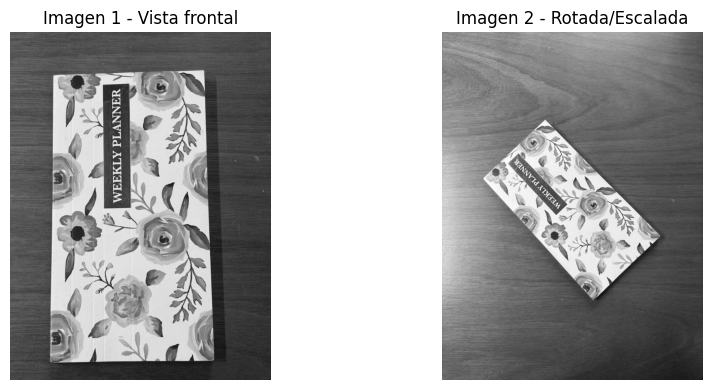

In [2]:
img1_path = 'img/cuaderno2.jpeg'  
img2_path = 'img/cuaderno1.jpeg'   

# imágenes en escala de grises
img1_gray = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1_gray, cmap='gray')
plt.title('Imagen 1 - Vista frontal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_gray, cmap='gray')
plt.title('Imagen 2 - Rotada/Escalada')
plt.axis('off')

plt.tight_layout()
plt.show()

### **2.2 Detección y descripción usando SIFT**

Número de keypoints SIFT en imagen 1: 6019
Número de keypoints SIFT en imagen 2: 4073


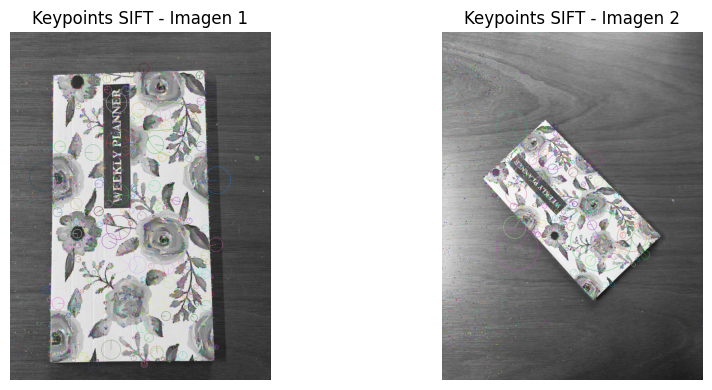

In [3]:
# CSIFT
sift = cv2.SIFT_create()

# se detectan keypoints y descriptores en ambas imágenes
kp1_sift, des1_sift = sift.detectAndCompute(img1_gray, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2_gray, None)

print(f'Número de keypoints SIFT en imagen 1: {len(kp1_sift)}')
print(f'Número de keypoints SIFT en imagen 2: {len(kp2_sift)}')


img1_sift = cv2.drawKeypoints(img1_gray, kp1_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_sift = cv2.drawKeypoints(img2_gray, kp2_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1_sift, cmap='gray')
plt.title('Keypoints SIFT - Imagen 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_sift, cmap='gray')
plt.title('Keypoints SIFT - Imagen 2')
plt.axis('off')

plt.tight_layout()
plt.show()

### **2.3 Detección y descripción usando ORB**

Número de keypoints ORB en imagen 1: 1000
Número de keypoints ORB en imagen 2: 1000


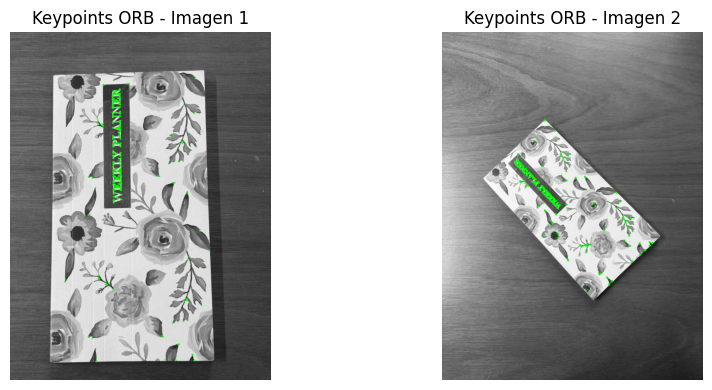

In [4]:
# ORB
orb = cv2.ORB_create(nfeatures=1000)

# se detectan keypoints y descriptores en ambas imágenes
kp1_orb, des1_orb = orb.detectAndCompute(img1_gray, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2_gray, None)

print(f'Número de keypoints ORB en imagen 1: {len(kp1_orb)}')
print(f'Número de keypoints ORB en imagen 2: {len(kp2_orb)}')

img1_orb = cv2.drawKeypoints(img1_gray, kp1_orb, None, color=(0, 255, 0), flags=0)
img2_orb = cv2.drawKeypoints(img2_gray, kp2_orb, None, color=(0, 255, 0), flags=0)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1_orb, cmap='gray')
plt.title('Keypoints ORB - Imagen 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_orb, cmap='gray')
plt.title('Keypoints ORB - Imagen 2')
plt.axis('off')

plt.tight_layout()
plt.show()

### **2.4 Matching con SIFT + Lowe's Ratio Test**

Matches totales SIFT: 6019
Matches SIFT (Lowe 0.75): 1360


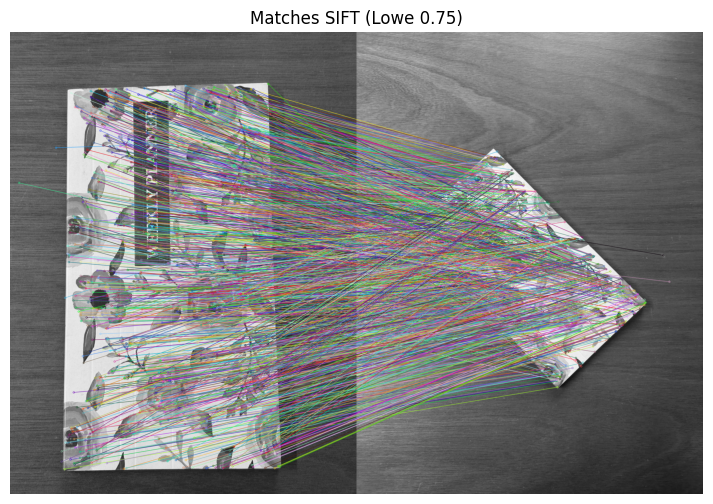

In [5]:
def lowe_ratio_test(knn_matches, ratio=0.75):
    good_matches = []
    for m, n in knn_matches:
        if m.distance < ratio * n.distance:
            good_matches.append(m)
    return good_matches

#  SIFT: norma L2 (Euclidiana)
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# KNN matching (k = 2)
matches_sift_knn = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

matches_sift = lowe_ratio_test(matches_sift_knn, ratio=0.75)
print(f'Matches totales SIFT: {len(matches_sift_knn)}')
print(f'Matches SIFT (Lowe 0.75): {len(matches_sift)}')

img_matches_sift = cv2.drawMatches(
    img1_gray, kp1_sift,
    img2_gray, kp2_sift,
    matches_sift, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12, 6))
plt.imshow(img_matches_sift, cmap='gray')
plt.title('Matches SIFT (Lowe 0.75)')
plt.axis('off')
plt.show()

### **2.5 Matching con ORB + Lowe's Ratio Test**

Matches totales ORB: 1000
Matches ORB (Lowe 0.75): 232


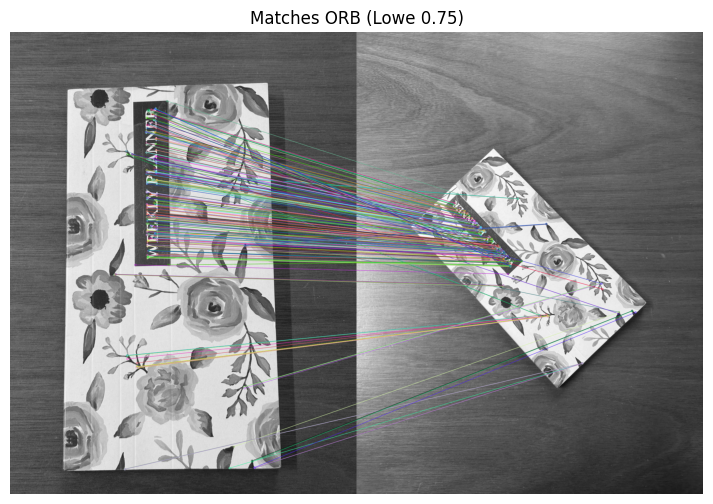

In [6]:
# Matcher para ORB: norma de Hamming
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# KNN matching (k = 2) sobre los descriptores ORB
matches_orb_knn = bf_orb.knnMatch(des1_orb, des2_orb, k=2)

matches_orb = lowe_ratio_test(matches_orb_knn, ratio=0.75)
print(f'Matches totales ORB: {len(matches_orb_knn)}')
print(f'Matches ORB (Lowe 0.75): {len(matches_orb)}')

img_matches_orb = cv2.drawMatches(
    img1_gray, kp1_orb,
    img2_gray, kp2_orb,
    matches_orb, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12, 6))
plt.imshow(img_matches_orb, cmap='gray')
plt.title('Matches ORB (Lowe 0.75)')
plt.axis('off')
plt.show()

### **2.6 SIFT vs ORB**

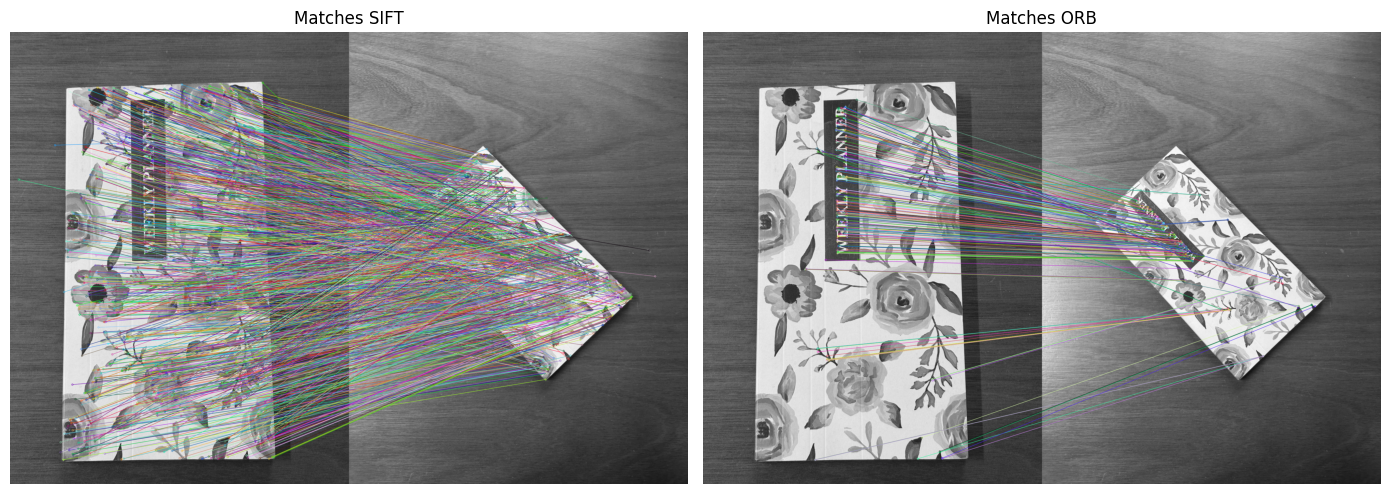

In [ ]:
# Comparación visual de matches para SIFT y ORB
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_matches_sift, cmap='gray')
plt.title('Matches SIFT')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_matches_orb, cmap='gray')
plt.title('Matches ORB')
plt.axis('off')

plt.tight_layout()
plt.show()

En la figura se comparan los matches obtenidos con SIFT y con ORB sobre las dos vistas del cuaderno/libreta. Como se puede observar, SIFT suele producir un número mayor de correspondencias consistentes entre ambas imágenes. En donde se ve que hay más líneas que conectan regiones visualmente similares del cuaderno. En donde muchos de los matches de SIFT se mantienen incluso en zonas donde la libreta está rotada y basicamente ligeramente más lejos esto debido a que SIFT está diseñado para ser invariante a escala y rotación. En general consideramos que  con SIFT los matches tienden a cubrir mejor toda la superficie de la libreta (la textura que son las flores y el texto de la portada), mientras que ORB a veces concentra las correspondencias en unas pocas áreas y deja otras areas sin cubrir. Ya que en el caso de ORB es más común ver algunas líneas que conectan puntos que claramente no pertenecen a la misma parte del objeto, apesar que se aplicó el Lowe’s Ratio Test se siguen apareciendo más outliers que en SIFT.

## **Prompt Utilizado**

**Uso de ChatGPT**

**Task 1**



**Task 2**

En la segunda tarea usamos ChatGPT como guía para diseñar el pipeline. Le preguntamos qué norma de distancia correspondía en el `BFMatcher` (L2 para SIFT y Hamming para ORB) y cómo implementar correctamente el Lowe’s Ratio Test con un umbral de 0.75 usando `knnMatch`. A partir de esa guía armamos la visualización de los buenos matches.


**Task 3**



### **Por qué funcionó este prompt**
